# The Exponential Distribution

The exponential distribution is used to describe the time between independent events that happen at an average rate.

This distribution can be easily deduced analitycaly, but it can be also simulated by using an uniform probability distribution.

## Simulating the Exponential Distribution

Independent events that happen at an average rate can be simulated with the Monte Carlo method and a uniform distribution.

Events that happen at an average rate of `R` events/time_unit can be simulated by a total of `T * R` events, where `T` is the total time units.

### Rate (R)

In [1]:
R = 5

### Total time (T)

In [2]:
T = 100

### Events

This means that we have to create `R*T` events having a random time of happening uniformly distributed between 0 and `T`

In [3]:
import numpy as np
events = np.random.uniform(low=0, high=T, size=R*T)

In [4]:
events[1:10]

array([ 8.21175894, 21.97721554, 49.61475777, 88.94951116, 48.13528624,
       58.34505997, 59.09961582, 13.57952107, 45.23074308])

### Time between events
Since the above events are random and the exponential distribution deals with the time betwenn consecutive events, we first need to sort the events from low to high

In [5]:
events = np.sort(events)

In [6]:
t_events = np.diff(events)

### Graph

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

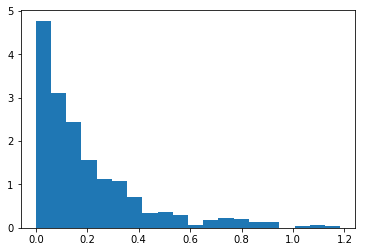

In [8]:
plt.hist(t_events, bins=20, density=True);

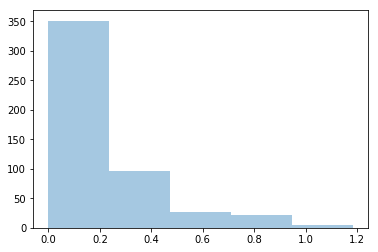

In [9]:
sns.distplot(t_events, hist=True, bins = 5, kde = False);

### Increasing the number of events

The above examples are Ok but the number of total events is low.

Will increasing the total number of events, without changing the rate, make a better simulation of the exponential distribution?

In [10]:
R = 5
T = 10000
events2 = np.random.uniform(low=0, high=T, size=R*T)
t_events2 = np.diff(np.sort(events2))

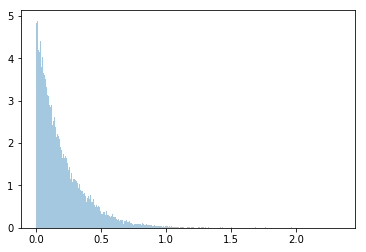

In [11]:
sns.distplot(t_events2, hist=True, bins=500, kde = False, norm_hist=True);

In [12]:
R = 5
T = 1000000
events3 = np.random.uniform(low=0, high=T, size=R*T)
t_events3 = np.diff(np.sort(events3))

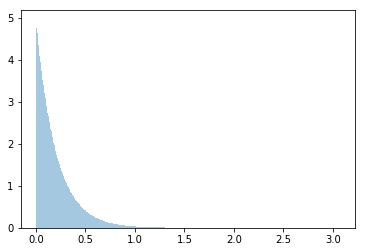

In [13]:
sns.distplot(t_events3, hist=True, bins= 500, kde = False, norm_hist=True );

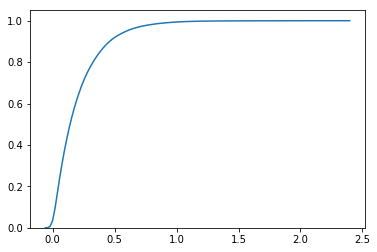

In [19]:
sns.distributions.kdeplot(t_events2, cumulative=True);

### True Exponential

In [15]:
z = np.random.exponential(scale = 1/R, size = len(t_events2))

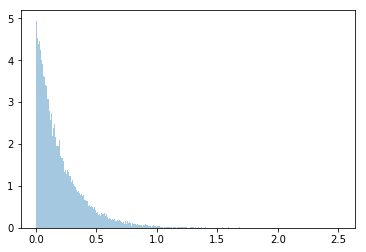

In [16]:
sns.distplot(z, hist=True, bins= 500, kde = False, norm_hist=True );

### Comparison

In [17]:
import pandas as pd
df = pd.DataFrame({'sim':t_events2, 'exp':z})

Comparing the cumulative distribution

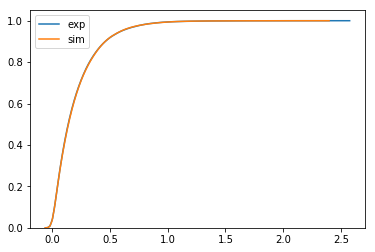

In [20]:
sns.distributions.kdeplot(df.exp, cumulative=True, legend=True);
sns.distributions.kdeplot(df.sim, cumulative=True, legend=True);

Comparing the density distribution.

The initial rise from 0 is due to how kdeplot interpolates the density distribution for the lowest time differences. The real exponential distribution does not have that rise.

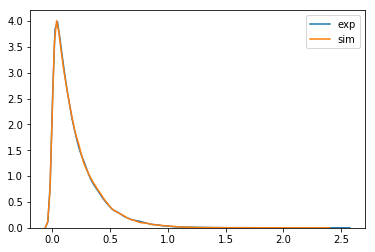

In [21]:
sns.distributions.kdeplot(df.exp, legend=True);
sns.distributions.kdeplot(df.sim, legend=True);

## Conclusion

An exponential distribution can be simulated by drawing `R*T` samples from a uniform distribution between 0 and `T`, where `R` is the average rate of events per unit time.